In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import mglearn

In [26]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("Keys:\n{}".format(cancer.keys()))

Keys:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [27]:
#print("Description of Dataset:\n{}".format(cancer.DESCR[:200]))
print("Target Names: {}".format(cancer.target_names))
print("Target (first 50 rows):\n{}".format(cancer.target[:50]))

Target Names: ['malignant' 'benign']
Target (first 50 rows):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1]


In [28]:
# Shape of Data
print("Shape of Data: {}".format(cancer.data.shape))

Shape of Data: (569, 30)


In [29]:
print("Sample count per class:")
for name, count in zip(cancer.target_names, np.bincount(cancer.target)):
    print(name,':',count)

Sample count per class:
malignant : 212
benign : 357


In [30]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 66, stratify=cancer.target)

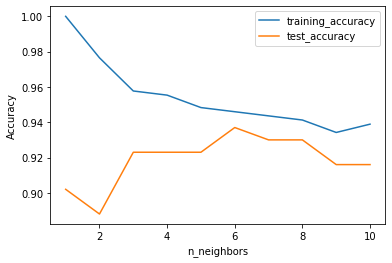

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

training_accuracy = []
test_accuracy = []

# try for neighbors 1 to 10
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting:
    # Build a model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf = clf.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record test accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label="training_accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()